# Experiment 12  
Description :  
* n_fft = 4096 
* Silent parts removed ( threshold based )  
* Vocal seperated  
* Twenty classes

> (Bageshri, Bhairav, Bihag, Darbari, Desh)


> (Gaud Malhar, Hansadhwani, Jog, Khamaj, Lalit)

> (Madhukauns, Madhuvanti, Malkauns, Maru Bihag, Marwa)

> (Miyan Ki Malhar, Shree, Shuddh Sarang, Todi, Yaman)
 
* Spectrograms of window length 10 seconds and hop length 5 seconds.


# Install libraries


In [ ]:
!cp -r "/gdrive/My Drive/Major Project/Images/Experiment 2/Data" "/content"

cp: cannot stat '/gdrive/My Drive/Major Project/Images/Experiment 2/Data': No such file or directory


In [ ]:
!pip install flashtorch --quiet

In [1]:
!pip install livelossplot --quiet

In [ ]:
!pip install InaSpeechSegmenter --quiet

     |████████████████████████████████| 13.9MB 235kB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 174kB 64.4MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 133kB 65.8MB/s 
     |████████████████████████████████| 163kB 59.3MB/s 
     |████████████████████████████████| 1.1MB 54.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
!pip install librosa==0.8.0 --quiet

     |████████████████████████████████| 184kB 5.0MB/s 
     |████████████████████████████████| 51kB 3.5MB/s 


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Image generation code / commands

In [4]:
import os
# from inaSpeechSegmenter.segmenter import Segmenter
import librosa
import librosa.display
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import gc
from librosa.effects import split

In [5]:
def separate_speech_silence(audio , fs , intermediate_path , index):
	"""
	Removes slient parts of the audio and saves resulting wavefile to intermediate path
	"""
	intervals = split(audio)
	result = np.array([])
	for interval in intervals:
		result = np.append(result , audio[interval[0]:interval[1]])
	scipy.io.wavfile.write(os.path.join(intermediate_path , str(index)+".wav") , fs , result)
	return result

In [6]:
def make_spec(audio , fs , output_path , index):
    """
    Makes spectrogram images from audio present at intermediate path and saves images at output path
    """
    window_length_in_sec = 10
    window_hop_in_sec = 5

    # audio , fs = librosa.load(intermediate_path)

    start = 0
    end = window_length_in_sec * fs
    idx = 0
    while end < len(audio):
        D_block = librosa.stft(audio[start:end] , center=False , n_fft = 4096 , hop_length=64)
        fig , ax = plt.subplots()
        librosa.display.specshow(D_block , y_axis="linear" , ax=ax)
        ax.set_ylim([0,1024])
        ax.set_ylabel("")
        plt.tick_params(axis="both" ,bottom=False , left=False)
        plt.yticks()
        ax.get_yaxis().set_visible(False)

        plt.savefig(os.path.join(output_path , str(index) + "_" + str(idx) + ".png" ) , bbox_inches="tight" , format="png" , pad_inches=0)
        fig.clf()
        plt.close()
        gc.collect()

        idx += 1
        start += window_hop_in_sec * fs
        end += window_hop_in_sec * fs



In [7]:
def generate_images(input_path , audio_path, output_path , index):
    audio , fs = librosa.load(input_path)
    audio = separate_speech_silence(audio , fs , audio_path , index)
    make_spec(audio , fs , output_path , index)


In [8]:
import pandas as pd

In [9]:
path = "/gdrive/My Drive/Major Project/Ragas data.csv"
df = pd.read_csv(path)
print(df.shape)
print(df.columns)

(300, 2)
Index(['Raga', 'Song'], dtype='object')


In [14]:
# trial code
class_name = "Maru Bihag"
temp = df.loc[df['Raga']==class_name]
base_s = "/gdrive/My Drive/Major Project/Vocals/"
raga_class = []
for i in range(len(temp)):
    raga_class.append(base_s + class_name + "/"+ str(temp.iloc[i][1]) + "/vocals.wav")
for i in range(len(raga_class)):
    print(str(i) + " : " + raga_class[i])
print("Total length : " + str(len(raga_class)))

0 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Maru_Bihag_631bde83-42e4-4c04-b260-3dbbd5b03799/vocals.wav
1 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Raag_Marubihag_fe91ccb2-499a-4d99-be22-3fdde04ee9aa/vocals.wav
2 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Rag_Maru_Bihag_Drut_Teental_a0cfb64b-6744-477e-9a17-e335a08e604f/vocals.wav
3 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Rag_Maru_Bihag_Vilambit_Teental_230998b8-34e1-4d6c-bc96-e0ff95146ddb/vocals.wav
4 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Raga_Maru_Bihag_56ad0c6b-6e9d-40e5-a917-96ec46c95e1c/vocals.wav
5 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Maru_Bihag_-_Ratiya_Hamari_-_Vilambit_Ektaal_80c94c75-4175-40ca-9f23-4e5a04f5e9cb/vocals.wav
6 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Tarapa_Tarapa_-_Drut_Ektaal_932be692-9ff8-4fe1-8546-b92b2d3db696/vocals.wav
7 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Kal_Nai_Aaye_and_Jagu_Main_Saari_Raina_a4fa5d55-8ea5-47dc-b411-f3

In [15]:
class_name = "Maru Bihag"
temp = df.loc[df['Raga']==class_name]
base_s = "/gdrive/My Drive/Major Project/Vocals/"
output_path = "/gdrive/My Drive/Major Project/Images/Experiment 12/Spectrograms/" + class_name + "/"
audio_path = "/gdrive/My Drive/Major Project/Images/Experiment 12/Silent Split/" + class_name + "/"
for i in range(len(temp)):
    input_path = base_s + class_name + "/"+ str(temp.iloc[i][1]) + "/vocals.wav"
    print(str(i) + " : " + input_path)
    generate_images(input_path , audio_path , output_path , i)

0 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Maru_Bihag_631bde83-42e4-4c04-b260-3dbbd5b03799/vocals.wav


/usr/local/lib/python3.6/dist-packages/librosa/display.py:823: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


1 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Raag_Marubihag_fe91ccb2-499a-4d99-be22-3fdde04ee9aa/vocals.wav
2 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Rag_Maru_Bihag_Drut_Teental_a0cfb64b-6744-477e-9a17-e335a08e604f/vocals.wav
3 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Rag_Maru_Bihag_Vilambit_Teental_230998b8-34e1-4d6c-bc96-e0ff95146ddb/vocals.wav
4 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Raga_Maru_Bihag_56ad0c6b-6e9d-40e5-a917-96ec46c95e1c/vocals.wav
5 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Maru_Bihag_-_Ratiya_Hamari_-_Vilambit_Ektaal_80c94c75-4175-40ca-9f23-4e5a04f5e9cb/vocals.wav
6 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Tarapa_Tarapa_-_Drut_Ektaal_932be692-9ff8-4fe1-8546-b92b2d3db696/vocals.wav
7 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Kal_Nai_Aaye_and_Jagu_Main_Saari_Raina_a4fa5d55-8ea5-47dc-b411-f3abe4ce5405/vocals.wav
8 : /gdrive/My Drive/Major Project/Vocals/Maru Bihag/Raga_Maru_Bihag_7199a72c-c660-40dc-8c

Number of images

In [28]:
import os

path1 = "/gdrive/My Drive/Major Project/Images/Experiment 9/Spectrograms"
exp9 = sum([len(files) for r, d, files in os.walk(path1)])
print("EXP 9: " + str(exp9))

path = "/gdrive/My Drive/Major Project/Images/Experiment 12/Spectrograms"
exp12 = sum([len(files) for r, d, files in os.walk(path)])
print("EXP 12: " + str(exp12))

print("Total: " + str(exp9 + exp12))

EXP 9: 19162
EXP 12: 49821
Total: 68983


Size of Data

In [ ]:
import os

total_size = 0
start_path = '/gdrive/My Drive/Major Project/Images/Experiment 11/Spectrograms'  # To get size of current directory
for path, dirs, files in os.walk(start_path):
    for f in files:
        fp = os.path.join(path, f)
        total_size += os.path.getsize(fp)
print("Directory size: " + str(total_size * 9.31 * (10**(-10))) + " GB")

Directory size: 5.016475142329 GB


Import dataset from google sheets

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc_ = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import pandas as pd

In [ ]:
# can import the csv file into df from a few cells above too
wb = gc_.open_by_url('https://docs.google.com/spreadsheets/d/1gysr1UIh8sgLvT7JJEeYHbR-EUQ95TjYE8JT7xowkOs/edit#gid=1882594633')
sheet = wb.worksheet('silent split')
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df.shape

(299, 2)

In [ ]:
!pip install pydub

In [ ]:
from os import path
from pydub import AudioSegment

# files
base = "/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Raga_Ahir_Bhairav_cbcba04b-023b-40e0-a5e8-04260ad3efdd" + "/"
src_a = base + "accompaniment.mp3"
dst_a = base + "accompaniment.wav"
src_v = base + "vocals.mp3"
dst_v = base + "vocals.wav"

# convert wav to mp3                                                            
sound_a = AudioSegment.from_mp3(src_a)
sound_a.export(dst_a, format="wav")
sound_v = AudioSegment.from_mp3(src_v)
sound_v.export(dst_v, format="wav")

<_io.BufferedRandom name='/gdrive/My Drive/Major Project/Vocals/Ahir Bhairav/Raga_Ahir_Bhairav_cbcba04b-023b-40e0-a5e8-04260ad3efdd/vocals.wav'>

In [ ]:
# append the list of classes in the below list
classes = ['Jog']

In [ ]:
for raag in classes:
    seperate_class_raga(raag)

In [ ]:
def seperate_class_raga(class_name):
    # class_name = "Darbari"
    print("\033[1m" + class_name + "\033[0m")

    temp = df.loc[df['Raga']==class_name]
    base_s = "/gdrive/My Drive/Major Project/Vocals/"
    raga_class = []
    for i in range(len(temp)):
        raga_class.append(base_s + class_name + "/"+ str(temp.iloc[i][1]) + "/vocals.wav")

    output_loc = "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/" + class_name
    os.makedirs(output_loc)
    for idx in range(len(raga_class)):
        print("\033[1m" + str(temp.iloc[idx][1]) + "\033[0m")
        separate_speech_silence(raga_class[idx] , output_loc, idx )
        print()

In [ ]:
for idx in range(len(bairagi)):
    generate_images(bairagi[idx] , "/gdrive/My Drive/Major Project/Images/Experiment 2/Bairagi" ,"/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Bairagi" , idx )

# Data Splitting

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
input_folder = "/gdrive/My Drive/Major Project/Images/Experiment 11/Spectrograms"
output_folder = "/gdrive/My Drive/Major Project/Images/Experiment 11/Data"
splitfolders.ratio(input_folder , output=output_folder, seed=42, ratio=(.8, .1, .1), group_prefix=None)

# Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as transforms
import torch.optim as optim
from torchvision import datasets
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from livelossplot import PlotLosses

# Data Loading

In [ ]:
# Data transforms : Resizing , Converting to Pytorch tensor , Nomralizing the image
# data_transforms = {
#     'train' : transforms.Compose([transforms.Resize(size=(324,216)),
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
#     'valid': transforms.Compose([transforms.Resize(size=(324,216)),
#                                transforms.ToTensor(),
#                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
#     'test': transforms.Compose([transforms.Resize(size=(324,216)),
#                                transforms.ToTensor(),
#                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) 
# }

data_transforms = {
    'train' : transforms.Compose([transforms.Resize(size=(324,216)),
                                 transforms.ToTensor(),
                                 ]),
    'valid': transforms.Compose([transforms.Resize(size=(324,216)),
                               transforms.ToTensor(),
                               ]),
    'test': transforms.Compose([transforms.Resize(size=(324,216)),
                               transforms.ToTensor(),
                               ]) 
}

main_dir = "/gdrive/My Drive/Major Project/Images/Experiment 10/Data"
# main_dir = "/content/Data"
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "val")
valid_dir = os.path.join(main_dir, "test")

# Making dataset objects
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['valid'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

batch_size = 8
num_workers = 0

# Making dataloader objects
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True,
                                           drop_last = True,)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True,
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=1, 
                                           num_workers=num_workers,
                                           shuffle=True)
loaders = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

# Modeling


In [ ]:
"""
This method returns Sequential Conv2d with/without batch normalisation of given size, same size by default
"""
def conv(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False, batch_norm=False):
    layers = []
    layers.append(nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias))
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

"""
Returns Maxpool2D, shrinks in half by default
"""
def pool(kernel_size=2, stride=2, padding=0):
    layers = []
    layers.append(nn.MaxPool2d(kernel_size, stride=stride, padding=padding))
    return nn.Sequential(*layers)

"""
Modify this to experiment on CNN architecture
Basic flow => Conv => BatchNorm => Activation => Dropout => Pooling
"""
class CNN(nn.Module):

    """
    Change in architecture must change forward function
    """
    def __init__(self, output_size=10):
        super(CNN, self).__init__()
        self.conv1 = conv(3, 32, 3, stride=1, padding=1, batch_norm=True)
        self.pool1 = pool(3, stride=3, padding=0)
        self.conv2 = conv(32, 64, 3, stride=1, padding=1, batch_norm=True)
        self.pool2 = pool(2, stride=2, padding=0)
        self.conv3 = conv(64, 64, 3, stride=1, padding=1, batch_norm=True)
        self.pool3 = pool(2, stride=2, padding=0)
        self.conv4 = conv(64, 64, 3, stride=1, padding=1, batch_norm=True)
        self.pool4 = pool(2, stride=2, padding=0)
        # TODO: write input size of FC1
        self.fc1 = nn.Linear(13*9*64, 512)
        self.fc2 = nn.Linear(512, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.conv1(x)                              # (324,216,3) => (324 , 216 , 32)
        x = F.relu(x)
        x = self.dropout(x)                           
        x = self.pool1(x)                              # (324 , 216 , 32) => (108 , 72 , 32)
        
        # print("Shape after 1st pooling layer " , x.shape)
        # One liner for all
        x = self.pool2(self.dropout(F.relu(self.conv2(x))))   # (107 , 71 , 32) => (107 , 71 , 64) => (54 , 36 , 64)
        # print("Shape after 2nd pooling layer " , x.shape)
        
        x = self.pool3(self.dropout(F.relu(self.conv3(x))))   #(54 , 36 , 64) => (54 , 36 , 128) => (27 , 18 , 64)
        # print("Shape after 3rd pooling layer " , x.shape)
        
        x = self.pool4(self.dropout(F.relu(self.conv4(x))))   # (13 , 9 , 64) 
        # print("Shape after 4th pooling layer " , x.shape)
        
        # Flatten                                             
        x = x.view(-1, x.shape[3]*x.shape[1]*x.shape[2])
        # print("Shape after flattening " , x.shape)
        
        x = F.relu(self.fc1(x))
        # print("Shape after FC 1 " , x.shape)

        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Training



In [ ]:
def train(model, loaders, n_epochs, optimizer, criterion, device, save_path, print_every=100 , stop_after=3):
    valid_loss_min = np.Inf
    stop = stop_after
    liveloss = PlotLosses()

    for epoch in range(1, n_epochs+1):
        logs = {}
        
        train_loss = 0.0
        valid_loss = 0.0
        running_loss_t = 0.0
        running_correct_t = 0
        running_loss_v = 0.0
        running_correct_v = 0.0
        print("Epoch number start " ,str(epoch) )
        # training
        model.train()
        for batch_index, (data, target) in enumerate(loaders['train']):
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()

            # print("Data size " , data.shape)
            # print("Target " , target)
            optimizer.zero_grad()         
            pred = model(data)
            # print("Pred " , pred)
            loss = criterion(pred, target)
            # running_loss_t += loss.detach()*data.size(0)
            loss.backward()
            optimizer.step()

            running_loss_t += loss.detach()*data.size(0)
            # running_corrects_ += torch.sum(pred == target)
            train_loss += ((1 / (batch_index + 1)) * (loss.data - train_loss))

            if batch_index%print_every == 0:
                print(f"Epoch {epoch} Batch {batch_index} loss {train_loss}")
        
        epoch_loss_t = running_loss_t / len(loaders["train"].dataset)
        logs["log loss"] = epoch_loss_t.item()
        
        
        # validation
        model.eval()
        for batch_index, (data, target) in enumerate(loaders['valid']):
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()
            # print("VAlid data shape " , data.shape)
            pred = model(data)
            loss = criterion(pred, target)
            running_loss_v += loss.detach()*data.size(0)
            valid_loss += ((1 / (batch_index + 1)) * (loss.data - valid_loss))

        epoch_loss_v = running_loss_v / len(loaders["valid"].dataset)
        logs["val_log loss"] = epoch_loss_v.item()

        liveloss.update(logs)
        liveloss.send()

        print(f"Epoch: {epoch} Training Loss: {train_loss} Validation Loss: {valid_loss}")

        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print(f"Validation Loss decreased from {valid_loss_min} to {valid_loss}. Saving model...")
            valid_loss_min = valid_loss
            stop_after = stop
        else:
            stop_after -= 1

        if stop_after == 0:
            return model
        print("Epoch end ",str(epoch))
    return model

# Main


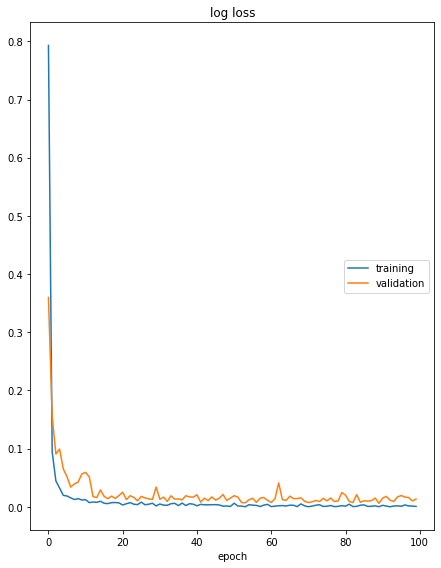

log loss
	training         	 (min:    0.000, max:    0.793, cur:    0.001)
	validation       	 (min:    0.006, max:    0.360, cur:    0.013)
Epoch: 100 Training Loss: 0.0006211255677044392 Validation Loss: 0.013209526427090168
Epoch end  100


In [ ]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
model = CNN(output_size=10)

# if device == 'cuda':
#     model = model.cuda()

model = model.cuda()
# Loss class
criterion = torch.nn.NLLLoss()
# Optimizer class
optimizer = optim.Adam(params=model.parameters() , lr=0.0001)

model = train(model, loaders, 100, optimizer, criterion, device, os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 10","model.pt"), print_every=100 , stop_after=300)
# test(model, loaders, criterion, device)

# Testing


In [ ]:
def test(model, loaders, criterion, device):
    test_loss = 0.0
    correct = 0.0
    total = 0.0

    model.eval()
    for batch_index, (data, target) in enumerate(loaders['test']):
        if device == 'cuda':
            data, target = data.cuda(), target.cuda()
        pred = model(data)
        loss = criterion(pred, target)
        test_loss += ((1 / (batch_index + 1)) * (loss.data - test_loss))
        pred = pred.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
    print("Correct : " , correct , " Total : " , len(loaders["test"]))
    print(f"Test loss {test_loss}")
    print(f"Testing accuracy {correct/total}")

In [ ]:
print(len(loaders["test"].dataset))

2311


In [ ]:
# model = torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1","model.pt"))
# model = CNN(output_size = 2)
model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 10","model.pt")))
# model = model.cuda()
test(model, loaders, criterion, device)

Correct :  2306.0  Total :  2311
Test loss 0.009493258781731129
Testing accuracy 0.9978364344439636


In [ ]:
print(len(loaders["test"]))

2311


In [ ]:
torch.save(model.state_dict() , os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 6","model.pt"))

# LSTM data preparation

In [ ]:
"""
Making a dataframe of all spectrogram files' path and their class
"""
import pandas as pd

path_df = pd.DataFrame(columns=["Path" , "Name" , "Raga"])
paths = []
names = []
ragas = []

dataset_path = "/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms"

raga_classes = ["Abhogi", "Ahir Bhairav", "Alhaiya Bilawal", "Basant", "Bairagi"]

# for file_name in os.listdir(os.path.join(dataset_path , "Abhogi")):
#     paths.append(os.path.join(dataset_path , "Abhogi" , file_name))
#     names.append(file_name.split("_")[0])
#     ragas.append("Abhogi")

# for file_name in os.listdir(os.path.join(dataset_path , "Basant")):
#     paths.append(os.path.join(dataset_path , "Basant" , file_name))
#     names.append(file_name.split("_")[0])
#     ragas.append("Basant")

for raga_class in raga_classes:
  for file_name in os.listdir(os.path.join(dataset_path , raga_class)):
    paths.append(os.path.join(dataset_path , raga_class , file_name))
    names.append(file_name.split("_")[0])
    ragas.append(raga_class)

path_df.Path = paths
path_df.Name = names
path_df.Raga = ragas

path_df.to_csv(dataset_path + str("/file.csv"))

raga_name_groupby = path_df.groupby(by=["Raga" , "Name"])
# print(raga_name_groupby.count())

FileNotFoundError: ignored

In [ ]:
print(raga_name_groupby.count())

                      Path
Raga            Name      
Abhogi          1       57
                10      27
                2       47
                3      124
                4       21
                5       65
                6      107
                7       53
                8       42
                9       80
Ahir Bhairav    0       43
                1       41
                2       21
                3      133
                4       90
                5       82
                6        8
                7      108
                8       97
                9       26
Alhaiya Bilawal 0       89
                1       24
                2       20
                3       58
                4       27
                5       67
                6       98
                7       72
                8       43
                9      158
Bairagi         0       67
                1       84
                2       23
                3      119
                4      162
 

In [ ]:
"""
Making sequences from the input 
"""
def batch_data(words, sequence_length, batch_size , raga_name , features , target):    
    n_targets = len(words) - sequence_length
    
    if n_targets < 1:
        return 
    
    for i in range(n_targets):
        end_idx = i + sequence_length
        
        batch = words[i : end_idx]
        features.append(batch)
        target.append(raga_name)
        
    return features , target

In [ ]:
"""
Saving pickle files of sequences of paths
"""
import pickle

raga_names = ["Abhogi", "Ahir Bhairav", "Alhaiya Bilawal", "Bairagi", "Basant"]
min_count = {"Abhogi":1, "Ahir Bhairav":0, "Alhaiya Bilawal":0, "Bairagi":0, "Basant":1}
max_count = {"Abhogi":11, "Ahir Bhairav":10, "Alhaiya Bilawal":10, "Bairagi":10, "Basant":11}

for raga_name in raga_names:
    features = []
    target = []
    for i in range(min_count[raga_name],max_count[raga_name]):
        # print("Starting " , i)
        features , target = batch_data(list(raga_name_groupby.get_group((raga_name,str(i))).Path) , 3 , 1 , raga_name , features , target)
        # print("Ending " , i)
    
    # print(len(target))
    with open(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths" , raga_name + "_feature") , "wb") as f:
        pickle.dump(features , f)
    with open(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths" , raga_name + "_target") , "wb") as f:
        pickle.dump(target , f)
print(features)

[['/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_0.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_1.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_2.png'], ['/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_1.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_2.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_3.png'], ['/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_2.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_3.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_4.png'], ['/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_3.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_4.png', '/gdrive/My Drive/Major Project/Images/Experiment 2/Spectrograms/Basant/1_5.png'], ['/gdri

In [ ]:
"""
Loading pickle files
"""
import pickle
abhogi_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Abhogi_feature" , "rb"))
abhogi_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Abhogi_target" , "rb"))

ahir_bhairav_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Ahir Bhairav_feature" , "rb"))
ahir_bhairav_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Ahir Bhairav_target" , "rb"))

alhaiya_bilwal_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Alhaiya Bilawal_feature" , "rb"))
alhaiya_bilwal_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Alhaiya Bilawal_target" , "rb"))

bairagi_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Bairagi_feature" , "rb"))
bairagi_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Bairagi_target" , "rb"))

basant_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Basant_feature" , "rb"))
basant_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 2/Paths/Basant_target" , "rb"))


In [ ]:
"""
Train test split
"""
from sklearn.model_selection import train_test_split

full_fv = abhogi_fv + ahir_bhairav_fv + alhaiya_bilwal_fv + bairagi_fv + basant_fv  
full_t = abhogi_t + ahir_bhairav_t + alhaiya_bilwal_t + bairagi_t + basant_t

X_train ,  X_test , y_train ,y_test = train_test_split(full_fv , full_t , test_size = 0.2)
X_valid ,  X_test , y_valid ,y_test = train_test_split(X_test ,y_test, test_size = 0.5)

print(len(X_train))
# print(X_train)
print(len(X_valid))
print(len(X_test))

2458
307
308


In [ ]:
"""
Custom Dataset class inheriting abstract Dataset class
"""
class SequenceDataset(torch.utils.data.Dataset):
    def __init__(self , x , y , cnn_model , test_transforms):
        self.x = x
        self.y = y
        self.cnn_model = cnn_model
        self.cnn_model.eval()
        self.test_transforms = test_transforms
        self.raga_encode = {"Abhogi":0, "Ahir Bhairav":1, "Alhaiya Bilawal":2, "Bairagi":3, "Basant":4}

    def __len__(self):
        return(len(self.x))

    def __getitem__(self , idx):
        """
        Returns sequence of feature vectors by getting output from cnn model
        """
        arr = self.x[idx]
        out = []
        for path in arr:
            with open(path, 'rb') as f:
                img = Image.open(f)
                img = img.convert('RGB')
            img = self.test_transforms(img)
            
            output = self.cnn_model(img.unsqueeze(0))
            output = output.reshape(-1,13*9*64)
            out.append(output)
            
        # if self.y[idx] == "Abhogi":
        #     t = torch.Tensor([0]).long()
        # else:
        #     t= torch.Tensor([1]).long()
        t = torch.Tensor([self.raga_encode[self.y[idx]]]).long()
        return torch.stack(out) , t


# Transforms
test_transforms = transforms.Compose([transforms.Resize(size=(324,216)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Loading the CNN model and removing the fully connected layers
model = CNN(output_size = 5)
model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","model_5classes_200e.pt") ,  map_location=torch.device('cpu')))

cnn_model = nn.Sequential(*list(model.children())[:8])

# Making dataset objects
train_dataset = SequenceDataset(X_train , y_train , cnn_model , test_transforms)
valid_dataset = SequenceDataset(X_valid , y_valid , cnn_model , test_transforms)
test_dataset = SequenceDataset(X_test , y_test , cnn_model , test_transforms)



In [ ]:
# Making Dataloader objects
loaders = {
    "train" : torch.utils.data.DataLoader(train_dataset,
                                           batch_size=1, 
                                           num_workers=0,
                                           shuffle=True,
                                           drop_last = False) ,
    "valid" : torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=1, 
                                           num_workers=0,
                                           shuffle=True,
                                           drop_last = False) ,
    "test" : torch.utils.data.DataLoader(test_dataset,
                                           batch_size=1, 
                                           num_workers=0,
                                           shuffle=True,
                                           drop_last = False)
}

# LSTM Modeling

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self , input_size = 1 , hidden_layer_size = 256 , output_size = 2, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size , hidden_layer_size, num_layers=self.num_layers)
        self.fc = nn.Linear(hidden_layer_size , output_size)
        self.softmax = nn.Softmax(dim=0)
        self.hidden = self.init_hidden()
    
    def init_hidden(self):
        return (torch.zeros(self.num_layers, 1, self.hidden_layer_size),
                torch.zeros(self.num_layers, 1, self.hidden_layer_size))
        

    def forward(self , input_seq):
        self.lstm.flatten_parameters()
        # print(input_seq[:10])
        lstm_out , self.hidden = self.lstm(input_seq)
        lstm_output = lstm_out.view(-1, self.hidden_layer_size)
        lstm_output = lstm_output[-1,:]
        # print(lstm_output.shape)
        model_output = self.fc(lstm_output)
        # print(model_output.shape)
        probabilities = self.softmax(model_output)
        return probabilities
        # return model_output
      
        

# LSTM training

In [ ]:
model_seq = LSTMModel(input_size = 7488, output_size=5)

# criterion = torch.nn.CrossEntropyLoss()
criterion = torch.nn.NLLLoss()
optimizer = optim.Adam(params=model_seq.parameters(), lr=0.00001)

model_seq = model_seq
model_seq = train_lstm(model_seq  , loaders , 10 , optimizer , criterion , "cpu" , os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","lstm_model_5classes.pt") , print_every = 10)


Epoch number start  1
Predicted  tensor([[0.2281, 0.1981, 0.1978, 0.1868, 0.1891]],
       grad_fn=<UnsqueezeBackward0>)  Target  tensor([1])
Epoch 1 Batch 0 loss -0.1980934590101242
Predicted  tensor([[0.2262, 0.1942, 0.1968, 0.1948, 0.1880]],
       grad_fn=<UnsqueezeBackward0>)  Target  tensor([3])
Predicted  tensor([[0.2291, 0.2007, 0.1935, 0.1880, 0.1886]],
       grad_fn=<UnsqueezeBackward0>)  Target  tensor([4])
Predicted  tensor([[0.2226, 0.2014, 0.1928, 0.1931, 0.1902]],
       grad_fn=<UnsqueezeBackward0>)  Target  tensor([2])
Predicted  tensor([[0.2231, 0.2043, 0.1957, 0.1889, 0.1879]],
       grad_fn=<UnsqueezeBackward0>)  Target  tensor([2])
Predicted  tensor([[0.2226, 0.2036, 0.1953, 0.1887, 0.1898]],
       grad_fn=<UnsqueezeBackward0>)  Target  tensor([3])
Predicted  tensor([[0.2221, 0.2012, 0.1935, 0.1934, 0.1897]],
       grad_fn=<UnsqueezeBackward0>)  Target  tensor([4])
Predicted  tensor([[0.2200, 0.2069, 0.1976, 0.1890, 0.1865]],
       grad_fn=<UnsqueezeBackward0>

In [ ]:
def train_lstm(model , loader , n_epochs , optimizer , criterion , device , save_path , print_every=100 , stop_after = 3):
    valid_loss_min = np.Inf
    stop = stop_after

    
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        print("Epoch number start " ,str(epoch) )
        # training
        model.train()
        for batch_index, (data, target) in enumerate(loader["train"]):    # for sequence in sequences
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()
            data = torch.squeeze(data , dim=0)
            # print("Data size " , data.shape)
            target = torch.squeeze(target , dim=0)
            # print("Target size " , target.shape)
            # print("Target " , target)

            optimizer.zero_grad()         
            pred = model(data)
            pred = torch.unsqueeze(pred , 0)
            # print("Pred " , pred.shape)
            # print("Prediction" , pred)
            
            # hidden_cell[0].detach_()
            # hidden_cell[1].detach_()

            print("Predicted " , pred , " Target " , target)
            loss = criterion(pred, target)
            model.train()
            loss.backward()
            optimizer.step()

            train_loss += ((1 / (batch_index + 1)) * (loss.data - train_loss))

            if batch_index%print_every == 0:
                print(f"Epoch {epoch} Batch {batch_index} loss {train_loss}")

        # validation
        model.eval()
        with torch.no_grad():
            for batch_index, (data, target) in enumerate(loader['valid']):
                if device == 'cuda':
                    data, target = data.cuda(), target.cuda()
                # print("VAlid data shape " , data.shape)
                data = torch.squeeze(data , dim=0)
                target = torch.squeeze(target , dim=0)

                pred = model(data)
                pred = torch.unsqueeze(pred , 0)

                loss = criterion(pred , target)
                valid_loss += ((1 / (batch_index + 1)) * (loss.data - valid_loss))

        print(f"Epoch: {epoch} Training Loss: {train_loss} Validation Loss: {valid_loss}")

        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print(f"Validation Loss decreased from {valid_loss_min} to {valid_loss}. Saving model...")
            valid_loss_min = valid_loss
            stop_after = stop
        else:
            stop_after -= 1

        if stop_after == 0:
            return model
        print("Epoch end ",str(epoch))
    return model

In [ ]:
import gc
gc.collect()

899

In [ ]:
def test(model, loaders, criterion, device):
    test_loss = 0.0
    correct = 0.0
    total = 0.0
    
    
    model.eval()
    for batch_index, (data, target) in enumerate(loaders['test']):
        if device == 'cuda':
            data, target = data.cuda(), target.cuda()
        data = torch.squeeze(data , dim=0)
        target = torch.squeeze(target , dim=0)
        
        # hidden_cell = (torch.zeros(1,1,256).cuda(),
        #             torch.zeros(1,1,256).cuda())
        
        pred = model(data)
        pred = torch.unsqueeze(pred , 0)

        print("Prediction " , pred , " Target " , target)
        loss = criterion(pred, target)
        test_loss += ((1 / (batch_index + 1)) * (loss.data - test_loss))
        pred = pred.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print(f"Test loss {test_loss}")
    print(f"Testing accuracy {correct/total}")

In [ ]:
model_path = "/gdrive/My Drive/Major Project/Images/Experiment 1/lstm_model.pt"

model = LSTMModel(input_size=7488)
model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1","lstm_model.pt")))
model = model.cuda()
criterion = torch.nn.CrossEntropyLoss()
test(model, loaders, criterion, "cuda")

tensor([[[2.2063, 2.5717, 2.6743,  ..., 1.3967, 1.3616, 0.9110]],

        [[2.1732, 2.6442, 2.6574,  ..., 1.4135, 1.3973, 1.0128]],

        [[2.1072, 2.5737, 2.4711,  ..., 1.5206, 1.5285, 1.0942]]],
       device='cuda:0', grad_fn=<SliceBackward>)
Prediction  tensor([[0.6223, 0.3777]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)  Target  tensor([1], device='cuda:0')
tensor([[[2.2189, 2.6144, 2.5751,  ..., 1.1925, 1.2059, 0.9625]],

        [[1.8403, 2.4216, 2.4074,  ..., 1.5296, 1.5316, 1.0789]],

        [[1.4118, 1.7334, 2.4824,  ..., 1.4117, 1.4619, 1.0462]]],
       device='cuda:0', grad_fn=<SliceBackward>)
Prediction  tensor([[0.6223, 0.3777]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)  Target  tensor([0], device='cuda:0')
tensor([[[2.0904, 2.5838, 2.6120,  ..., 1.3173, 1.2219, 0.9045]],

        [[2.1722, 2.5863, 2.5882,  ..., 1.1711, 1.1668, 0.8438]],

        [[2.3033, 2.6930, 2.6991,  ..., 1.2107, 1.2031, 0.8463]]],
       device='cuda:0', grad_fn=<SliceBackward>)
Pr

# Model Interpretation


In [ ]:
from flashtorch.saliency.backprop import Backprop
from flashtorch.utils import load_image

In [ ]:
# model = torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","model.pt"))
model = CNN(output_size = 5)
model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2/model_5classes_200e.pt")))


<All keys matched successfully>

In [ ]:
backprop = Backprop(model)

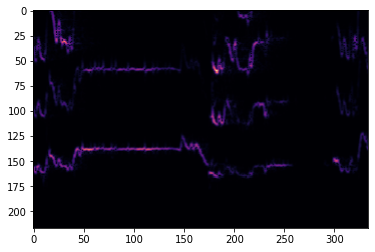

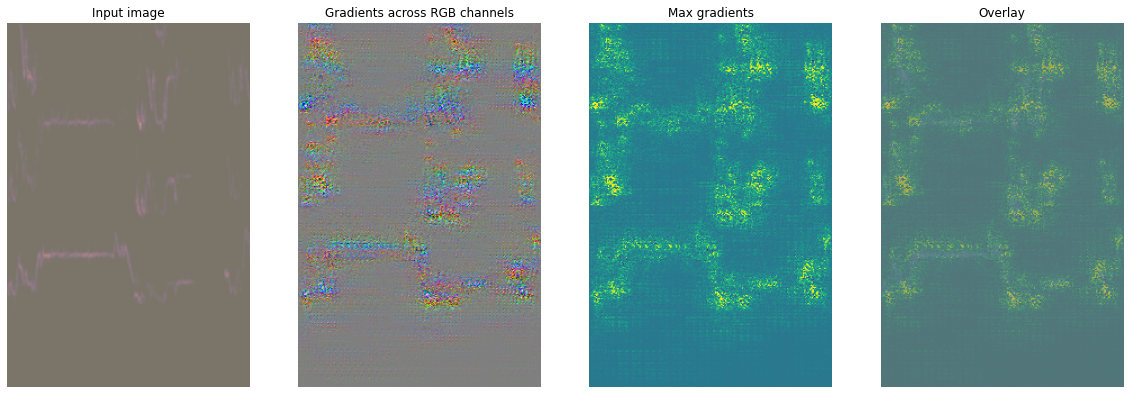

In [ ]:
image = load_image("/gdrive/My Drive/Major Project/Images/Experiment 2/Data/test/Abhogi/9_49.png")

plt.imshow(image)
inp = data_transforms["test"](image)
inp = inp.unsqueeze(dim=0)
inp.requires_grad = True

backprop.visualize(inp , 0 , guided=False , figsize=(20,10))
